<a href="https://colab.research.google.com/github/nohsh92/DataScience/blob/main/3_4_strange_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 데이터 다운로드 링크로 데이터를 코랩에 불러옵니다.

!wget 'https://bit.ly/3i4n1QB'

import zipfile
with zipfile.ZipFile('3i4n1QB', 'r') as existing_zip:
    existing_zip.extractall('data')

--2022-03-29 13:21:57--  https://bit.ly/3i4n1QB
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw [following]
--2022-03-29 13:21:57--  https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw
Resolving drive.google.com (drive.google.com)... 142.251.33.206, 2607:f8b0:4004:837::200e
Connecting to drive.google.com (drive.google.com)|142.251.33.206|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7d1u9mg63rlv5uditehahm78ui9t4sqn/1648560075000/17946651057176172524/*/1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw?e=download [following]
--2022-03-29 13:21:58--  https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deff

In [20]:
# 라이브러리 불러오기

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [21]:
# read_csv() 매서드로 train.csv 파일을 df class 로 불러오세요.

train = pd.read_csv('data/train.csv')

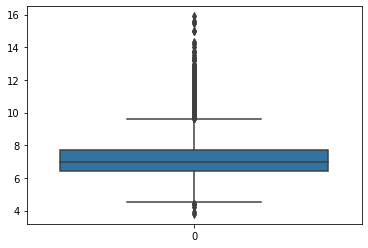

In [22]:
# boxplot() 매서드로 'fixed acidity' 피쳐의 이상치를 확인하는 코드를 아래에 작성하세요.

sns.boxplot(data=train['fixed acidity'])

In [23]:
# read_csv() 매서드로 train.csv 파일을 df class 로 불러오세요.

train = pd.read_csv('data/train.csv')

train.shape

# train에는 현재 몇개의 행이 있는지 알 수 있습니다.

(5497, 14)

In [24]:
# "fixed acidity"가 25%인 값을 "quantile_25" 라는 변수에 만들어 주세요

quantile_25 = np.quantile(train['fixed acidity'], 0.25)

In [25]:
# "fixed acidity"가 75%인 값을 "quantile_75" 라는 변수에 만들어 주세요

quantile_75 = np.quantile(train['fixed acidity'],0.75)

In [26]:
# quantile_75와 quantile_25의 차이를 "IQR"이라는 변수에 만들어 주세요

IQR = quantile_75 - quantile_25

In [27]:
# quantile_25보다 1.5 * IQR 작은 값을 "minimum"이라는 변수에 만들어 주세요

minimum = quantile_25 - 1.5 * IQR

In [28]:
# quantile_75보다 1.5 * IQR 큰 값을 "maximum"이라는 변수에 만들어 주세요

maximum = quantile_75 + 1.5 * IQR

In [29]:
# "fixed acidity"가 minimum보다 크고, maximum보다 작은 값들만 "train2"에 저장해 주세요

train2 = train[(minimum <= train['fixed acidity']) & (train['fixed acidity'] <= maximum)]

In [30]:
# train2.shape를 통해서, 총 몇개의 행이 되었는지 확인해보세요.

train2.shape

(5203, 14)

In [31]:
# 몇개의 이상치가 있는지도 계산해보세요.
# 294개의 이상치를 발견해 제거했습니다.

train.shape[0] - train2.shape[0]

294

In [32]:
# read_csv() 매서드로 train.csv 파일을 df class 로 불러오세요.
train = pd.read_csv('data/train.csv')

In [33]:
# describe를 통해 "fixed acidity"의 데이터의 분포가 어떻게 생겼는지 짐작해보세요
train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


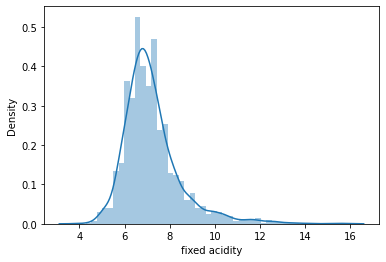

In [34]:
# seaborn의 displot을 통해 "fixed acidity"의 distplot을 그려보세요

sns.distplot(train['fixed acidity'])

In [35]:
# MinMaxScaler를 "scaler"라는 변수에 지정해주세요

scaler = MinMaxScaler()

In [36]:
# "scaler"를 학습시켜주세요

scaler.fit(train[['fixed acidity']])

MinMaxScaler()

In [37]:
# "scaler"를 통해 train의 "fixed acidity"를 바꾸어 "Scaled fixed acidity"라는 column에 저장해주세요

train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


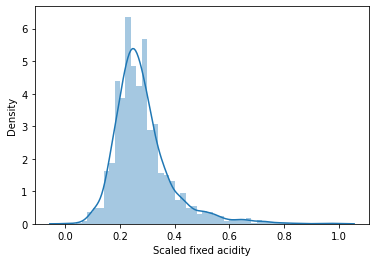

In [38]:
# seaborn의 displot을 통해 "Scaled fixed acidity"의 distplot을 그려보세요

sns.distplot(train['Scaled fixed acidity'])

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
# read_csv() 매서드로 train.csv 파일을 df class 로 불러오세요.
train = pd.read_csv('data/train.csv')

In [41]:
# "OneHotEncoder"를 "encoder"라는 변수에 저장해보세요

encoder = OneHotEncoder()

In [42]:
# "encoder"를 사용해 train의 "type" 피쳐를 학습시켜보세요

encoder.fit(train[['type']])

OneHotEncoder()

In [43]:
# "encoder"를 사용해 train의 "type"피쳐를 변환해 "onehot"이라는 변수에 저장해보세요
onehot = encoder.transform(train[['type']])
onehot

<5497x2 sparse matrix of type '<class 'numpy.float64'>'
	with 5497 stored elements in Compressed Sparse Row format>

In [44]:
# "onehot"이라는 변수를 array 형태로 변환해 보세요

onehot = onehot.toarray()
onehot

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [45]:
# "onehot"이라는 변수를 DataFrame 형태로 변환해 보세요

onehot = pd.DataFrame(onehot)
onehot.head()

,0,1
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [46]:
# encoder의 "get_feature_names()"를 사용해 column 이름을 바꿔보세요
onehot.columns = encoder.get_feature_names()
onehot.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_red,x0_white
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [47]:
# onehot을 원본데이터인 train에 병합시켜보세요

onehot = pd.concat([train, onehot], axis = 1)
onehot.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,x0_red,x0_white
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white,0.0,1.0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red,1.0,0.0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white,0.0,1.0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white,0.0,1.0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white,0.0,1.0


In [48]:
# train의 "type" 변수를 제거해주세요
train = train.drop(columns = ['type'])
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9


In [49]:
### 코드를 더 단순화 시켜볼게요!
train = pd.read_csv('data/train.csv')
encoder = OneHotEncoder()
onehot = pd.DataFrame(encoder.fit_transform(train[['type']]).toarray(), columns = encoder.get_feature_names())
train = pd.concat([train,onehot], axis = 1).drop(columns = ['type'])
train.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,x0_red,x0_white
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0.0,1.0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1.0,0.0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0.0,1.0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0.0,1.0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0.0,1.0
